In [3]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


In [6]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

# Setting up data

In [9]:
dataset_dir = "food 10 class"
output_dir = "food split"

train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")
val_dir = os.path.join(output_dir, "val")

In [13]:
for directory in [train_dir,test_dir, val_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

In [14]:
categories = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok= True)
    os.makedirs(os.path.join(val_dir, category), exist_ok= True)
    os.makedirs(os.path.join(test_dir, category), exist_ok= True)

    images = os.listdir(os.path.join(dataset_dir, category))

    random.shuffle(images)

    train_images, temp_images = train_test_split(images, test_size=0.3, random_state= 42)
    val_images, test_images = train_test_split(temp_images, test_size= 0.5, random_state= 42)

    for image in train_images:
        shutil.copy(os.path.join(dataset_dir, category, image), os.path.join(train_dir, category, image))

    for image in test_images:
        shutil.copy(os.path.join(dataset_dir, category, image), os.path.join(test_dir, category, image))

    for image in val_images:
        shutil.copy(os.path.join(dataset_dir, category, image), os.path.join(val_dir, category, image))


In [16]:
# Check the number of images in each directory
print("Train set:")
for category in categories:
    print(category, ":", len(os.listdir(os.path.join(train_dir, category))))

print("\nValidation set:")
for category in categories:
    print(category, ":", len(os.listdir(os.path.join(val_dir, category))))

print("\nTest set:")
for category in categories:
    print(category, ":", len(os.listdir(os.path.join(test_dir, category))))


Train set:
ice_cream : 700
samosa : 700
chicken_curry : 700
waffles : 700
sushi : 700
hamburger : 700
pancakes : 700
pizza : 700
dumplings : 700
fried_rice : 700

Validation set:
ice_cream : 150
samosa : 150
chicken_curry : 150
waffles : 150
sushi : 150
hamburger : 150
pancakes : 150
pizza : 150
dumplings : 150
fried_rice : 150

Test set:
ice_cream : 150
samosa : 150
chicken_curry : 150
waffles : 150
sushi : 150
hamburger : 150
pancakes : 150
pizza : 150
dumplings : 150
fried_rice : 150


# Visualising the data

In [7]:
def visualize_images(image_dir, category, num_classes = 5):
    image_files = os.listdir(os.path.join(train_dir, category))

    plt.figure(figsize=(15,10))

    for i,image_file in enumerate(image_files[:num_classes]):

        img_path = os.path.join(image_dir, category, image_file)
        img = Image.open(img_path)

        plt.subplot(1, num_classes, i+1)
        plt.imshow(img)
        plt.title(f"{category}\n {image_file}")
        plt.axis('off')

        print(f"Image : {image_file}")
        print(f"Size : {img.size}")
        print(f"Mode : {img.mode}")
        print(f"Format : {img.format}")
        print('-' * 30)
    
    plt.show()

Image : 2282416.jpg
Size : (512, 512)
Mode : RGB
Format : JPEG
------------------------------
Image : 2401578.jpg
Size : (384, 512)
Mode : RGB
Format : JPEG
------------------------------
Image : 2302.jpg
Size : (512, 384)
Mode : RGB
Format : JPEG
------------------------------
Image : 1787008.jpg
Size : (512, 384)
Mode : RGB
Format : JPEG
------------------------------
Image : 3831680.jpg
Size : (512, 512)
Mode : RGB
Format : JPEG
------------------------------


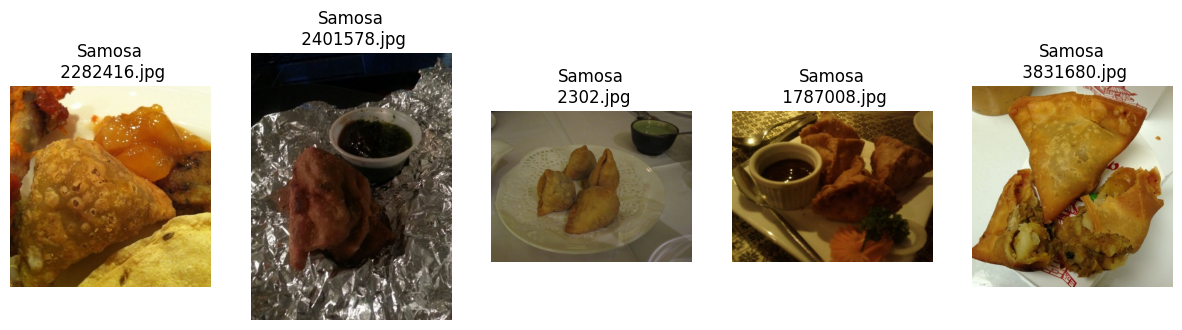

In [10]:
visualize_images(train_dir, "Samosa" )

# Preparing Data for Model

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

val_data = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

test_data = val_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 7000 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.


In [43]:
test_data

In [112]:
print("batch size", train_data.image_shape)

batch size (150, 150, 3)


# Making CNN model

In [80]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

inputs = Input(shape = (150,150,3))

x = Conv2D(16, (3,3), activation = 'relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, (3,3), activation = 'relu')(x)
x = BatchNormalization()(x)
# x = MaxPooling2D(pool_size= (2,2))(x)

x = Conv2D(64, (3,3), activation = 'relu')(x)
# x = BatchNormalization()(x)
x = MaxPooling2D(pool_size= (2,2))(x)

x = Conv2D(128, (3,3), activation = 'relu')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D(pool_size= (2,2))(x)

x = Conv2D(256, (3,3), activation = 'relu')(x)
# x = BatchNormalization()(x)
x = MaxPooling2D(pool_size= (2,2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation = 'softmax')(x)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [113]:
from tensorflow.keras import layers

# Create base model
input_shape = (150, 150, 3)
base_model = tf.keras.applications.EfficientNetB4(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model 
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = layers.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.Flatten()(x)
x = layers.Dense(10)(x) # want one output neuron per class 
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x) 
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [12]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"
     

In [14]:
# Download the pretrained model and save it as a Keras layer
feature_extractor_layer = hub.KerasLayer(efficientnet_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(150,150,3)) # define the input image shape
  
# Create our own model
efficientnet_model = tf.keras.Sequential([
feature_extractor_layer, # use the feature extraction layer as the base
layers.Dense(10, activation='softmax', name='output_layer') # create our own output layer      
])

In [15]:
efficientnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [16]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=20, restore_best_weights = True)

history = efficientnet_model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size,
    epochs=100,  # Adjust epochs based on your needs,
    callbacks = [callback]
    )

Epoch 1/100
218/218 [==============================] - 50s 212ms/step - loss: 0.8596 - accuracy: 0.7619 - val_loss: 0.5864 - val_accuracy: 0.8166
Epoch 2/100
218/218 [==============================] - 46s 210ms/step - loss: 0.4823 - accuracy: 0.8588 - val_loss: 0.5057 - val_accuracy: 0.8397
Epoch 3/100
218/218 [==============================] - 48s 221ms/step - loss: 0.4035 - accuracy: 0.8786 - val_loss: 0.4914 - val_accuracy: 0.8438
Epoch 4/100
218/218 [==============================] - 49s 224ms/step - loss: 0.3547 - accuracy: 0.8942 - val_loss: 0.4685 - val_accuracy: 0.8471
Epoch 5/100
218/218 [==============================] - 48s 221ms/step - loss: 0.3184 - accuracy: 0.9064 - val_loss: 0.4688 - val_accuracy: 0.8499
Epoch 6/100
218/218 [==============================] - 49s 224ms/step - loss: 0.2878 - accuracy: 0.9149 - val_loss: 0.4571 - val_accuracy: 0.8567
Epoch 7/100
218/218 [==============================] - 50s 227ms/step - loss: 0.2651 - accuracy: 0.9237 - val_loss: 0.4577 -

In [18]:
efficientnet_model.evaluate(test_data)

47/47 [==============================] - 13s 268ms/step - loss: 0.4547 - accuracy: 0.8540


[0.4546694755554199, 0.8539999723434448]

# Making prediction using our model

1/1 [==============================] - 0s 33ms/step


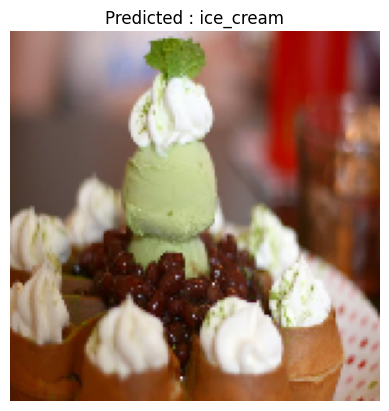

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_process_image(image_path, target_size = (150, 150)):
    img = load_img(image_path, target_size= target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img, img_array


def predict_image(model, img_array, class_indices):
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis = 1)[0]
    predicted_label = list(class_indices.keys())[list(class_indices.values()).index(predicted_class)]
    return predicted_class, predicted_label


def visualize_prediction(img, predicted_label):
    plt.imshow(img)
    plt.title(f"Predicted : {predicted_label}")
    plt.axis('off')
    plt.show()

image_path = 'food split/test/waffles/29618.jpg'
img, img_array = load_and_process_image(image_path)
predicted_class, predicted_label = predict_image(efficientnet_model, img_array, test_data.class_indices)

visualize_prediction(img, predicted_label)

In [ ]:
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay

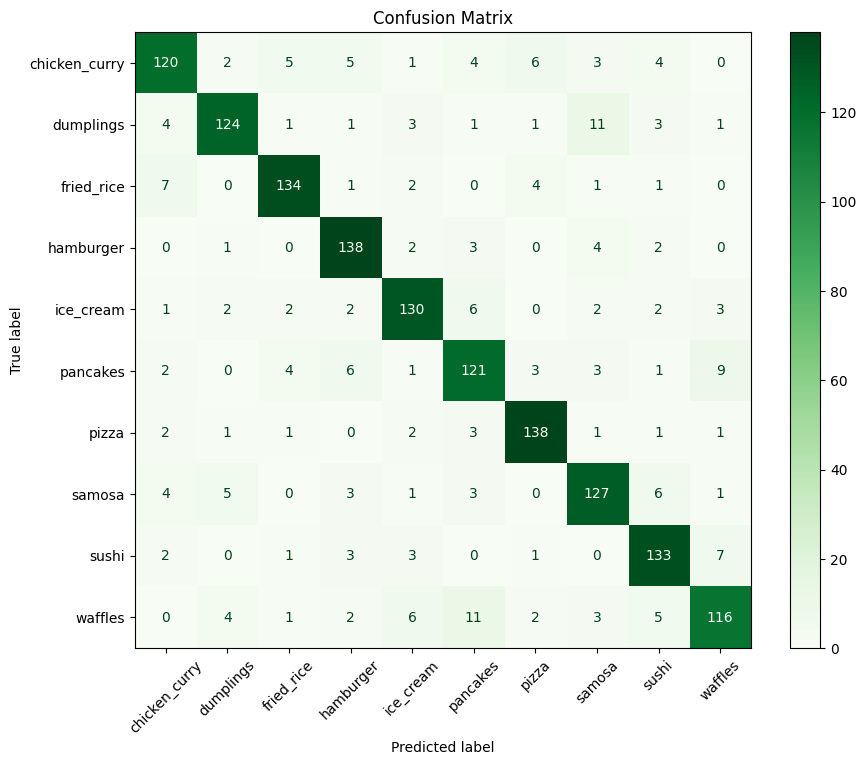

In [56]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Y_pred = efficientnet_model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1) 


conf_matrix = confusion_matrix(test_data.classes, y_pred)


plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(test_data.class_indices.keys()))
disp.plot(cmap = plt.cm.Greens, ax = plt.gca(),xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


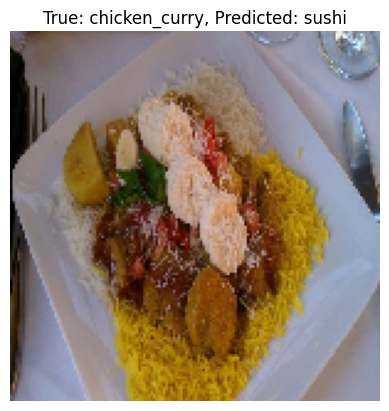

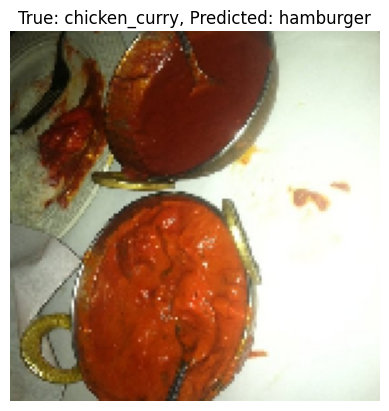

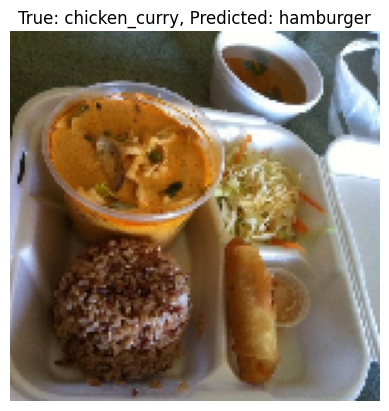

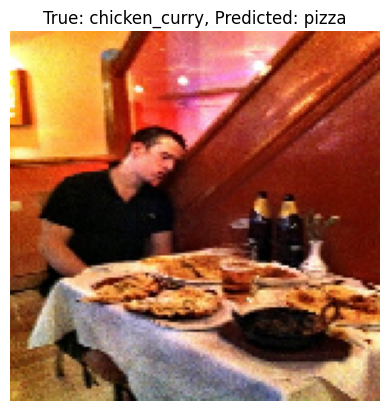

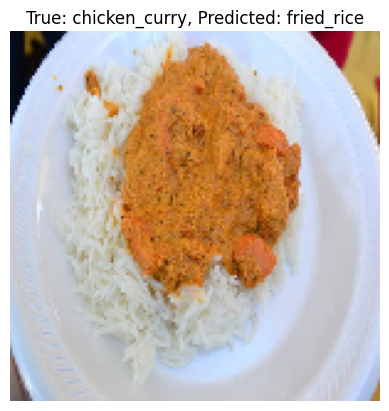

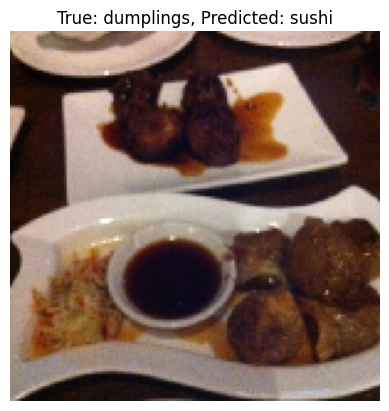

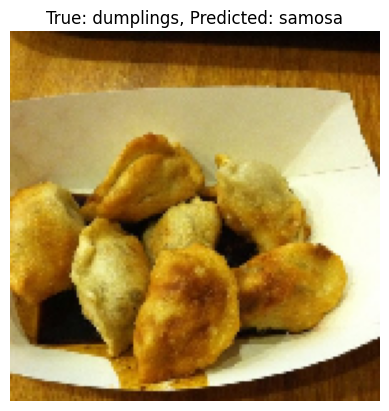

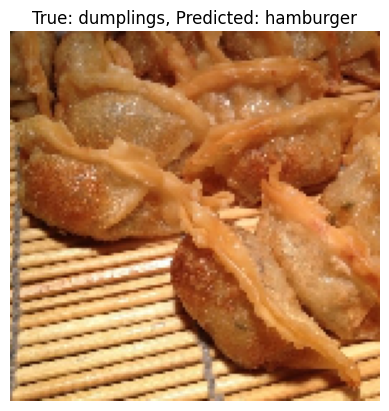

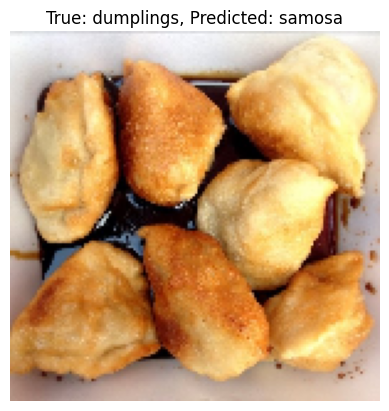

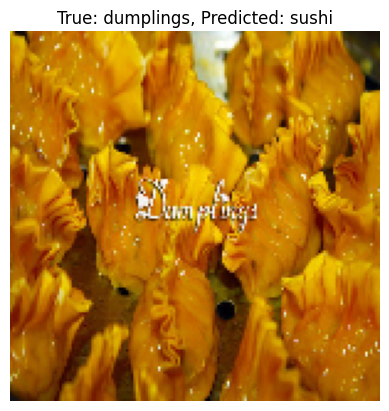

In [60]:
import numpy as np
import matplotlib.pyplot as plt


y_pred = np.argmax(Y_pred, axis=1)  
y_true = test_data.classes 


incorrect_indices = np.where(y_pred != y_true)[0]

for i in incorrect_indices[25:35]: 
    img_path = test_data.filepaths[i]
    img = load_img(img_path, target_size=(150, 150))
    
    plt.imshow(img)
    plt.title(f"True: {list(test_data.class_indices.keys())[y_true[i]]}, Predicted: {list(test_data.class_indices.keys())[y_pred[i]]}")
    plt.axis('off')
    plt.show()
